In the linear regression models we examined each had a continuous response variable. However, what happens if we want to build a regression model for a binary response instead? Or for a numeric discrete response? Luckily, there is a family of linear models that includes all three cases – continuous, numeric discrete, and binary – of regression response variables: General Linear Models (GLMs).

Let's visit the clothing_sales_training and clothing_sales_test data sets. This time, our goal is to determine whether or not customers have a store credit card, so our marketing team can send out advertisements to non‐holders, enticing them to sign up for a card. Our response variable in this case is binary: Yes, the customer has a card; or No, the customer does not. Since the response variable is binary, we will use logistic regression.

In [ ]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
from scipy import stats 

import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url1 = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/clothing_sales_training.csv'
sales_train = pd.read_csv(url1) 

url2 = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/clothing_sales_test.csv'
sales_test = pd.read_csv(url2)

In [ ]:
sales_train.head(12)

,CC,Days,Web,Sales per Visit
0,0,333.00,0,184.230000
1,0,171.50,0,38.500000
2,0,213.00,0,150.326667
3,1,71.40,1,104.240000
4,1,145.00,0,782.080000
5,0,447.00,0,79.000000
6,0,118.00,0,172.990000
7,0,73.80,0,21.276000
8,0,276.00,0,87.480000
9,0,67.75,0,26.802500


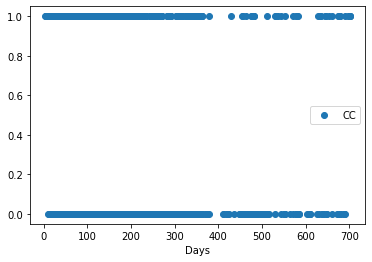

In [ ]:
sales_train.plot(x='Days', y='CC', style='o')  

In [ ]:
X = pd.DataFrame(sales_train[['Days', 'Web']]) #predictors
X = sm.add_constant(X)
y = pd.DataFrame(sales_train[['CC']]) #target

In [ ]:
X = pd.DataFrame(sales_train['Days'])

In [ ]:
regressor = LinearRegression()  
regressor.fit(X, y) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.coef_)

[[-0.00084872]]


In [ ]:
y_pred = regressor.predict(X)

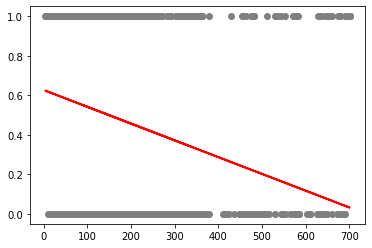

In [ ]:
plt.scatter(X['Days'], y,  color='gray')
plt.plot(X['Days'], y_pred, color='red', linewidth=2)
plt.show()

To perform logistic regression, use the Logit() and fit() commands. Save the model output and run the summary2() command on the saved model output to view the model results.

In [ ]:
logreg01 = sm.Logit(y, X).fit()
logreg01.summary2()

Optimization terminated successfully.
         Current function value: 0.676634
         Iterations 4


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.023    
Dependent Variable: CC               AIC:              1965.5924
Date:               2020-06-11 20:57 BIC:              1970.8724
No. Observations:   1451             Log-Likelihood:   -981.80  
Df Model:           0                LL-Null:          -1004.9  
Df Residuals:       1450             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
Days     -0.0017     0.0003   -6.7074   0.0000   -0.0022   -0.0012
================================================================

"""

In [ ]:
X_test = pd.DataFrame(sales_test[['Days', 'Web']])
X_test = sm.add_constant(X_test)
y_test = pd.DataFrame(sales_test[['CC']])
logreg01_test = sm.Logit(y_test, X_test).fit()
logreg01_test.summary2()

Optimization terminated successfully.
         Current function value: 0.656885
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.052     
Dependent Variable: CC               AIC:              1838.7104 
Date:               2020-06-11 20:57 BIC:              1854.4324 
No. Observations:   1395             Log-Likelihood:   -916.36   
Df Model:           2                LL-Null:          -966.40   
Df Residuals:       1392             LLR p-value:      1.8534e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.4634     0.0873    5.3105   0.0000    0.2924    0.6345
Days      -0.0035     0.0004   -8.2261   0.0000   -0.0043   -0.0026
Web        1.0973     0.2830    3.8780   0.0001    0.5427    1.6519
=================================================================

"""

In [ ]:
y_predLR = logreg01_test.predict(X_test)

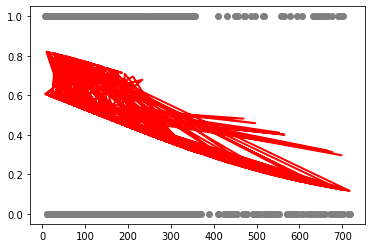

In [ ]:
plt.scatter(X_test['Days'], y_test,  color='gray')
plt.plot(X_test['Days'], y_predLR, color='red', linewidth=2)
plt.show()

In [ ]:
X = pd.DataFrame(sales_train['Days'])#, 'Web']]) #predictors
X = sm.add_constant(X)
y = pd.DataFrame(sales_train[['CC']]) #target

In [ ]:
X = sales_train['Days'].values.reshape(-1,1)
y = sales_train['CC'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)#, test_size=0.2, random_state=0)

In [ ]:
X_train.size

1088

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)

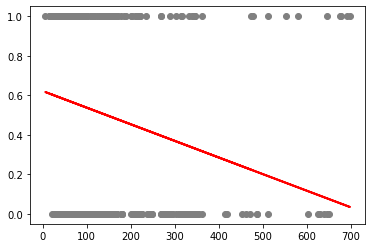

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor2 = LogisticRegression()  
regressor2.fit(X_train, y_train) #training the algorithm
y_pred = regressor2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


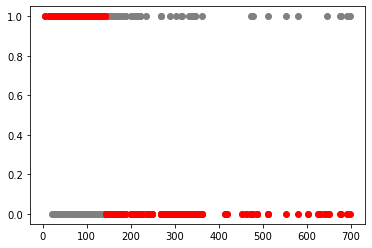

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.scatter(X_test, y_pred, color='red')
#plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.show()

In [ ]:
# Poisson regression code
import statsmodels.api as sm
exog, endog = sm.add_constant(X_test), y_test
mod = sm.GLM(endog, exog,
             family=sm.families.Poisson(link=sm.families.links.log))
mod.fit()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """
